## 인도 중고차 데이터 EDA 및 시각화 파트 

### 0. 패키지 및 데이터 불러오기 

In [1]:
import pandas as pd  # pandas 패키지 불러오기 
pd.set_option('display.max_columns', None)  # 데이터 프레임 모든 열 표시

import matplotlib.pyplot as plt  # matplotlib 패키지 불러오기
import seaborn as sns      # seaborn 패키지 불러오기 
import math                # 원할한 함수 사용을 위해 math 패키지 불러오기 
import warnings       # 경고표시 나오지 않게 하는 warnings 패키지 불러오기 
warnings.filterwarnings(action='ignore')     # 경고표시 설정 : "무시"

# 한글 설정
from matplotlib import rc   
plt.rcParams['axes.unicode_minus'] = False   # 그래프 한글 설정을 위해 matplotlib에서 rc 불러오기 (한글 깨짐 현상을 막아줌)

# 폰트설정(시스템에 따라 다르게 설정 window = malgun, mac = AppleGothic)
import platform
if platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')
else:
    print('Unknown system... sorry~~')

In [2]:
# 주의 : 파이차트 시각화를 위해 패키지 설치 (원할한 시각화를 나타내기 위해 0.5.8 버전으로 설치해야함)
# pip install pyecharts==0.5.8 

In [3]:
# 데이터 불러오기 
car_t = pd.read_csv('./train_data_r.csv') # 엔진, 파워 ,시트의 결측값을 직접 채운 파일 
car_tr = pd.read_csv('./train_data_n.csv') # cr단위 변환 # 직접 채우지 않은 파일

### 1. 데이터 전처리 

#### 1-1 데이터와 결측치 확인 

In [4]:
# 데이터 확인
car_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


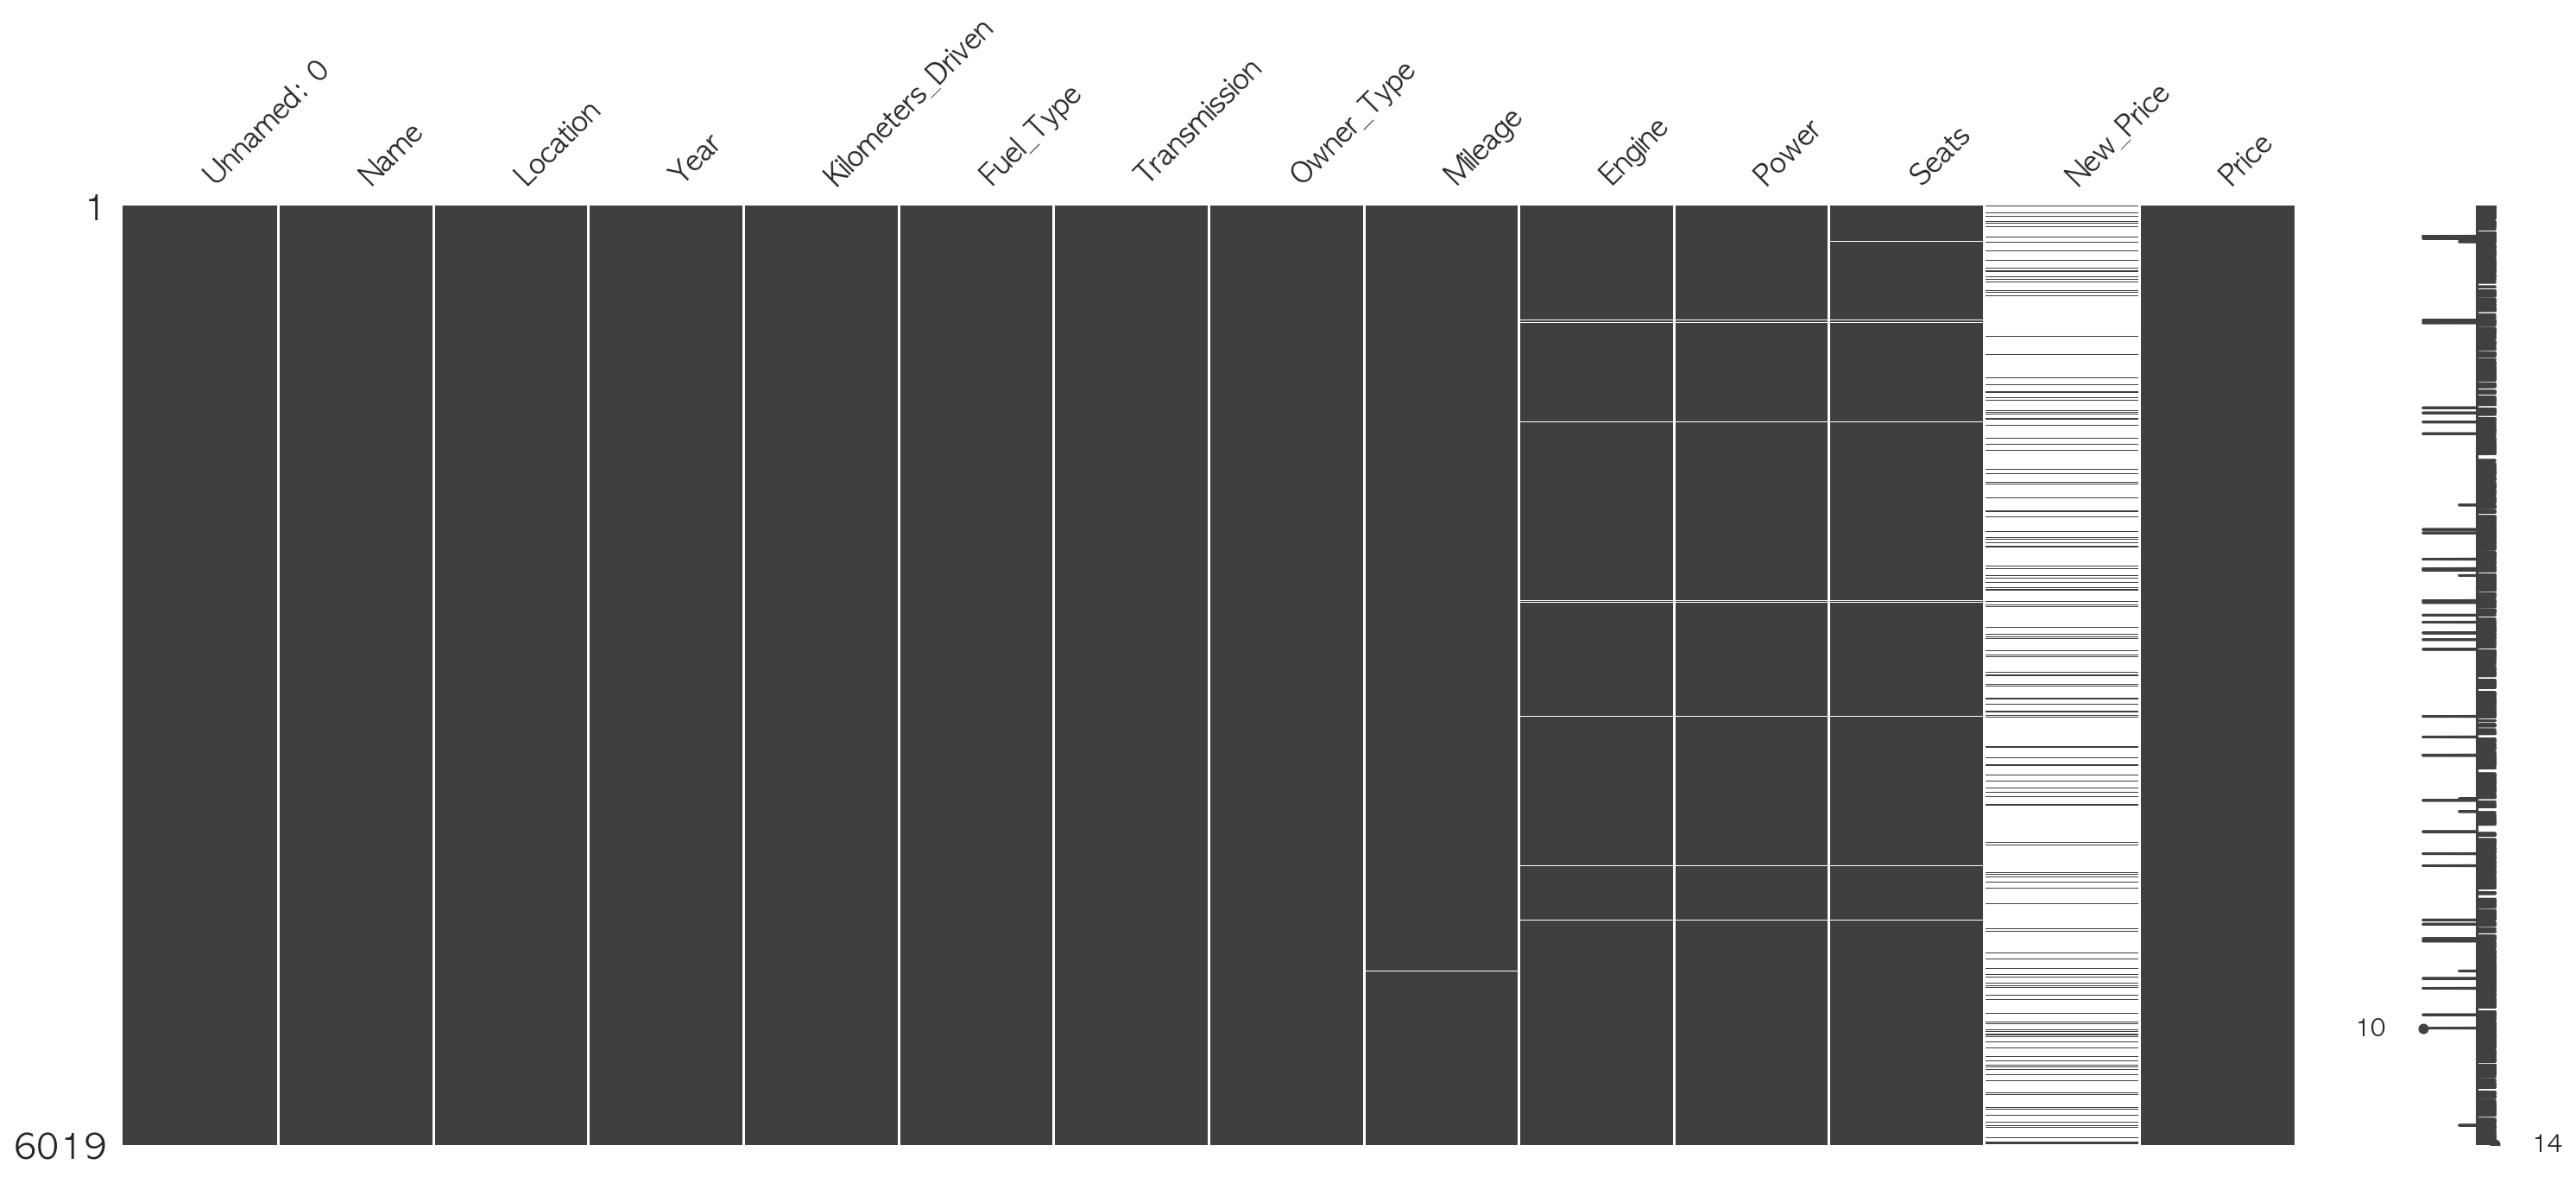

In [5]:
# car_tr(cr단위로 변환한, 결측치 데이터를 채우지 않은 데이터) 데이터 결측치 확인 
import missingno
missingno.matrix(car_tr)
plt.show()

- car_tr(원본데이터)의 데이터를 살펴보면 Engine, Power, Seats에 결측치가 존재 함.

In [6]:
# 데이터(결측치를 수잡하여 채운 데이터) 확인 
car_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             6019 non-null   object 
 10  Power              6019 non-null   object 
 11  Seats              6019 non-null   int64  
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(1), int64(4), object(9)
memory usage: 658.5+ KB


In [7]:
# 결측치 확인 (car_t)
car_t.isna().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                  0
Power                   0
Seats                   0
New_Price            5195
Price                   0
dtype: int64

- car_t(결측치를 채운 데이터)데이터를 보면 수기로 채워 Engine, Power, Seats의 결측치를 채움

In [8]:
# New_price에서 결측치를 0 Lakh로 채워 넣기
car_t['New_Price'] = car_t['New_Price'].fillna('0 Lakh')

In [9]:
# Mileage null값 확인 (총 2개의 null 값이 확인 되었음. 확인결과 전기차)
car_t[car_t['Mileage'].isnull()]

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4446,4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5,13.58 Lakh,13.00
4904,4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5,0 Lakh,12.75


In [10]:
# Fuel Type 별 시각화
fuel = pd.DataFrame(car_t['Fuel_Type'].value_counts())

In [11]:
from pyecharts import Pie

keys = list(fuel["Fuel_Type"].keys())
values = list(fuel["Fuel_Type"].values)

pie = Pie("Fuel_Type")
pie.add("", keys, values, is_randome=True, radius=[50, 80], rosetype='radius', is_legend_show=False,
       is_label_show=True)

pie

- Fuel Type 별로 데이터 확인 
- Diesel : 53.25%, Petrol : 45.62%, CNG: 0.93%, CNG : 0.93%, LPG : 0.17%, Electric : 0.03%
- 전기차는 거래량도 적고, 연비정보도 없기에 해당 데이터 삭제(drop)

In [12]:
# Mileage null값 제거
car_t = car_t.drop([4446, 4904])
car_t.reset_index(drop=True, inplace=True)

In [13]:
# 필요없는 컬럼 'Unnamed: 0' 제거 
car_t.drop(['Unnamed: 0'], axis=1, inplace=True)

In [14]:
# 단위제거 함수
def get_split(data, column, new):

    ls1 = data[column]
    ls2 = []
    for i in range(0,len(data)):
        ls2.append(ls1[i].split(' ')[0])
        
    data[new] = ls2
    print(new)
    
def get_split2(data, column, new):

    ls1 = data[column]
    ls2 = []
    for i in range(0,len(data)):
        ls2.append(ls1.str.split(' ', n=1)[i][1])
        
    data[new] = ls2
    print(new)

In [15]:
# 단위제거 완료
get_split(car_t, 'Name', 'Brand')
get_split2(car_t, 'Name', 'Car_name')
get_split(car_t, 'Mileage', 'Mile')
get_split(car_t, 'Engine', 'Eng')
get_split(car_t, 'Power', 'Pow')
get_split(car_t, 'New_Price', 'New_p')

Brand
Car_name
Mile
Eng
Pow
New_p


In [16]:
# 연비, 베기량, 마력, 신차가격 형변환 (범주형 -> 수치형)
car_t[['Mile', 'Eng', 'Pow', 'New_p']] = car_t[['Mile', 'Eng', 'Pow', 'New_p']].astype(float)

In [17]:
# 중복된 브랜드 (ISUZU와 Isuzu)를 Isuzu로 하나로 합치기 
car_t['Brand'][car_t['Brand'] == 'ISUZU'] = 'Isuzu'

In [18]:
# 전처리 한 car_t 데이터 최종 확인 
car_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6017 entries, 0 to 6016
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6017 non-null   object 
 1   Location           6017 non-null   object 
 2   Year               6017 non-null   int64  
 3   Kilometers_Driven  6017 non-null   int64  
 4   Fuel_Type          6017 non-null   object 
 5   Transmission       6017 non-null   object 
 6   Owner_Type         6017 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             6017 non-null   object 
 9   Power              6017 non-null   object 
 10  Seats              6017 non-null   int64  
 11  New_Price          6017 non-null   object 
 12  Price              6017 non-null   float64
 13  Brand              6017 non-null   object 
 14  Car_name           6017 non-null   object 
 15  Mile               6017 non-null   float64
 16  Eng                6017 

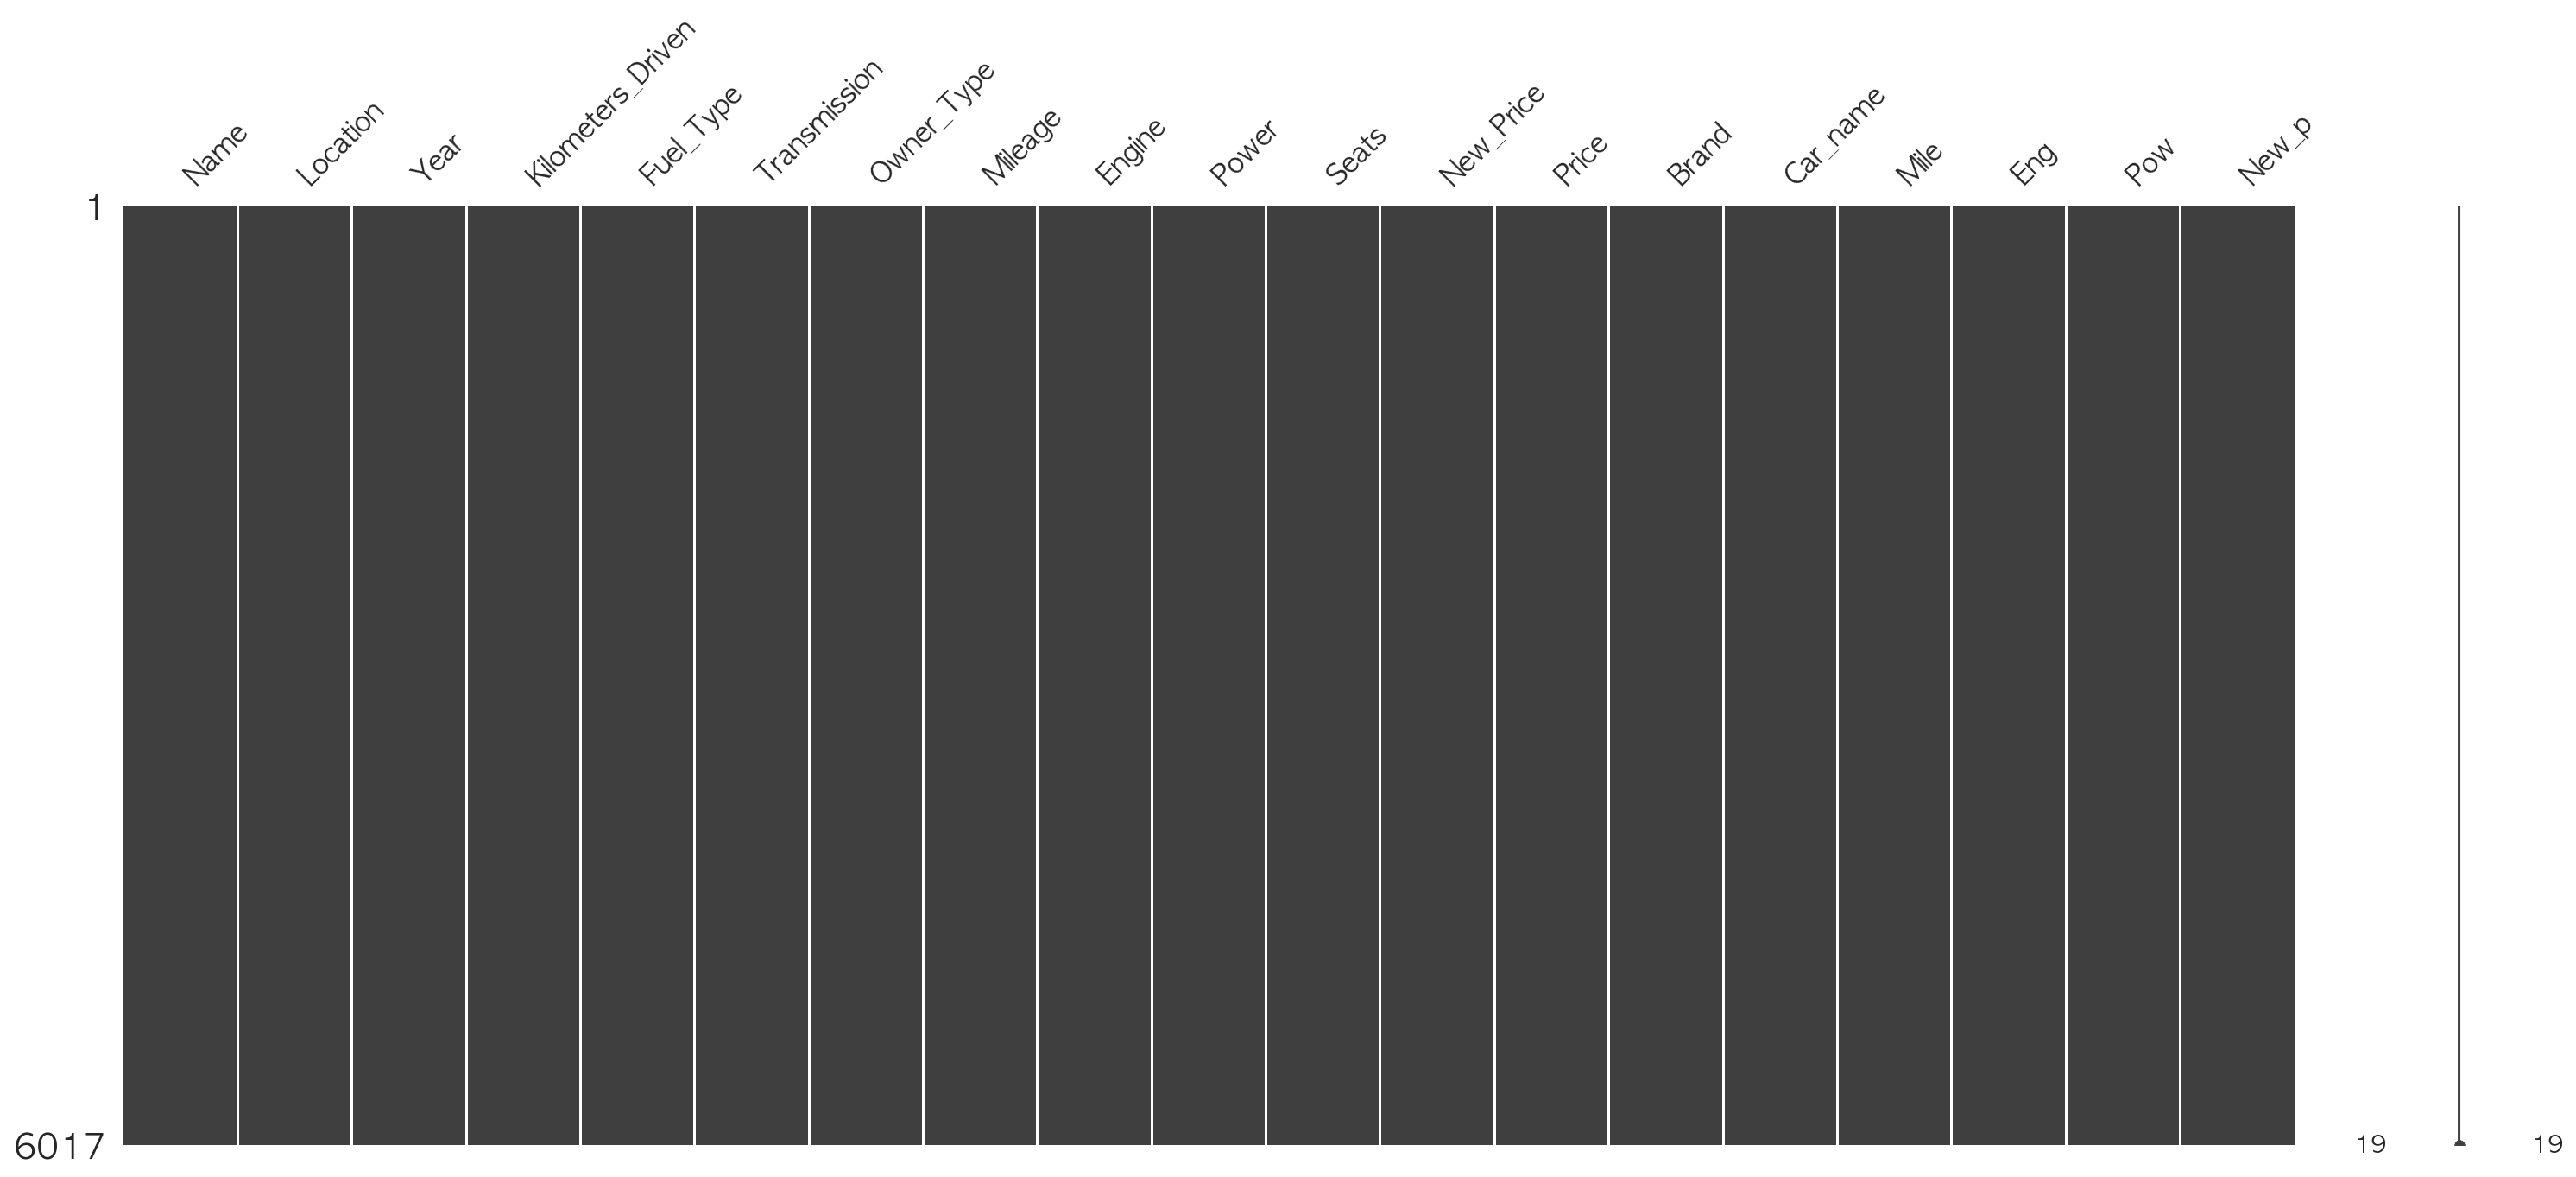

In [19]:
# car_t의 결측치 확인 
missingno.matrix(car_t)
plt.show()

- 결측지 모두 제거 

### 2. EDA 

#### 2-1 Brand

In [20]:
brand = car_t.groupby(by=['Brand'], as_index=True).count()

In [21]:
from pyecharts import Pie

key = list(brand['Name'].index)
value = list(brand['Name'].values.round())

pie = Pie("Brand Count ")
pie.add("", key, value, radius=[40, 80], label_text_color=None, is_label_show=True,
        is_legend_show=False, legend_orient='vertical')

pie

In [22]:
# Brand Top 10 
brand_10 = pd.DataFrame(car_t['Brand'].value_counts())

In [23]:
key = list(brand_10["Brand"][:10].keys())
value = list(brand_10["Brand"][:10].values)

pie = Pie("Brand Top 10 ")
pie.add("", key, value, is_randome=True, radius=[50, 90], rosetype='radius', is_legend_show=False,
       is_label_show=True)

pie

In [24]:
# 브랜드별 가격
brand = car_t.groupby(by=['Brand'], as_index=True).mean()

In [25]:
from pyecharts import Bar, Line, Overlap

key = list(brand['Price'].index)
value = list(brand['Price'].values.round())

bar = Bar("Price by Brand")
bar.add("Mean Pricer", key, value)

bar.height = 600
bar.width = 1300

bar

- 브랜드별 가격 평균을 보니 람보르기니가 가장 높게 나온다. (참고로 람보르기니의 판매건은 1건이다)

#### 2-2 연도별 분포 
- 두 가지버전 

In [26]:
# 연도별 분포 그래프 1
year = pd.DataFrame(car_t['Year'].value_counts()).sort_index() 

In [27]:
from pyecharts import Bar, Line, Overlap

key = list(year["Year"].keys())
value = list(year["Year"].values)

bar =Bar("Car count in Year", "1999년 ~ 2019년")
bar.add("count", key, value, mark_line=["average"], mark_point=["max", "min"])

bar.height = 600
bar.width = 1200

bar

- 중고차 거래가 가장 활발한 년도는 797건으로 2014녀도이고, 가장 적은 년도는 2건으로 1999년도 이다.

In [28]:
# 연도별 분포 그래프 2
from pyecharts import Bar

key = list(year["Year"].keys())
value = list(year["Year"].values)
value2 = list(year["Year"].values)
bar = Bar("Car count in Year", "1999 ~ 2019")
# the first add() legend to be transparent, ie 'rgba(0,0,0,0)', and set the is_stack flag is True
bar.add("Year", key, value, label_color=['rgba(0,0,0,0)'], is_stack=True)
bar.add("Count", key, value2, is_label_show=True, is_stack=True, label_pos='inside')

bar.height = 600
bar.width = 1200
bar.render()
bar

#### 2-3 지역별 분포 

In [29]:
# 지역별 분포 
location = pd.DataFrame(car_t['Location'].value_counts())

In [30]:
keys = list(location["Location"].keys())
values = list(location["Location"].values)

pie = Pie("Location")
pie.add("", keys, values, is_randome=True, radius=[50, 90], rosetype='radius', is_legend_show=False,
       is_label_show=True)

pie

In [31]:
# 지역별 가격표
location = car_t.groupby(by=['Location'], as_index=True).mean()

In [32]:
key = list(location['Price'].index)
value = list(location['Price'].values.round())

bar =Bar("Used car price by region")
bar.add("Price", key, value, mark_line=["average"], mark_point=["max", "min"])

bar.height = 600
bar.width = 1200
bar

#### 2-4 변속기 타입 

In [50]:
# 변속기 타입 그래프 1
tr = pd.DataFrame(car_t['Transmission'].value_counts())

In [51]:
keys = list(tr['Transmission'].keys())
values = list(tr['Transmission'].values)

pie = Pie("Transmission", title_pos='center')
pie.add("", keys, values, is_randome=True, radius=[50, 90], label_text_color=None, is_label_show=True,
        legend_orient='vertical', legend_pos='left')


pie

In [35]:
# 변속기 타입 그래프 2  - 수동 71.45% 

from pyecharts import Gauge

gauge = Gauge("Transmission")
gauge.add("", "Manual Ratio", 71.45, angle_range=[180, 0], scale_range=[0, 100], is_legend_show=False)
gauge.render()
gauge

In [52]:
# 변속기 타입 그래프 2  - 자동 28.55% 

gauge = Gauge("Transmission")
gauge.add("", "Auto Ratio", 28.55, angle_range=[180, 0], scale_range=[0, 100], is_legend_show=False)
gauge.render()
gauge

In [37]:
# 지역별 가격표
trp = car_t.groupby(by=['Transmission'], as_index=True).mean()

In [38]:
key = list(trp['Price'].index)
value = list(trp['Price'].values.round())

bar = Bar()
bar.add("Transsmmision Price", key, value)

bar.height = 500
bar.width = 800
bar

- 당연한 이야기지만 자동이 수동에 비해 가격이 높다.

#### 2-5. 오너 타입

In [53]:
owner = pd.DataFrame(car_t['Owner_Type'].value_counts())

In [54]:
keys = list(owner['Owner_Type'].keys())
values = list(owner['Owner_Type'].values)

pie = Pie("Owner_Type", title_pos='center')
pie.add("", keys, values, radius=[40, 80], label_text_color=None, is_label_show=True,
        legend_orient='vertical', legend_pos='left')

pie

In [55]:
# 오너 타입별 가격
owner = car_t.groupby(by=['Owner_Type'], as_index=True).mean()

In [56]:
key = list(owner['Price'].index)
value = list(owner['Price'].values.round())

bar = Bar()
bar.add("Price by Owner Type", key, value)

bar.height = 500
bar.width = 800
bar

- 대체적으로 첫번째 오너가 많다.

#### 2-6. 연료 타입 

In [43]:
fuel = pd.DataFrame(car_t['Fuel_Type'].value_counts())

In [45]:
from pyecharts import Liquid

# 디젤 - 53%
liquid = Liquid("Diesel")
liquid.add("Liquid", [0.53, 0.43, 0.33, 0.23])

liquid

In [46]:
# Petrol - 46%
liquid = Liquid("Diesel")
liquid.add("Liquid", [0.46, 0.36, 0.26, 0.16], shape='diamond')

liquid

In [57]:
# Fuel 타입별 가격
fuel = car_t.groupby(by=['Fuel_Type'], as_index=True).mean()

In [58]:
key = list(fuel['Price'].index)
value = list(fuel['Price'].values.round())

bar = Bar()
bar.add("Price by Fuel Type", key, value)

bar.height = 500
bar.width = 800
bar

- 디젤이 가장 높다 
- 참고로 인도는 가격이 저렴한 디젤 모델의 사용이 가장 높다. 이유는 가격이 저렴해서이고, 인도 정부에서 환경에 대한 제재를 잘 하지 않는다.